In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Overlaid Histograms

In [3]:
galton = Table.read_table('galton.csv')
galton.show(3)

In [4]:
height = galton.select('father', 'mother', 'childHeight').relabeled(2, 'child')
height

father | mother | child
78.5   | 67     | 73.2
78.5   | 67     | 69.2
78.5   | 67     | 69
78.5   | 67     | 69
75.5   | 66.5   | 73.5
75.5   | 66.5   | 72.5
75.5   | 66.5   | 65.5
75.5   | 66.5   | 65.5
75     | 64     | 71
75     | 64     | 68
... (924 rows omitted)

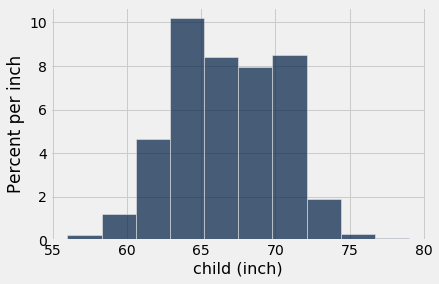

In [5]:
height.hist('child', unit='inch')

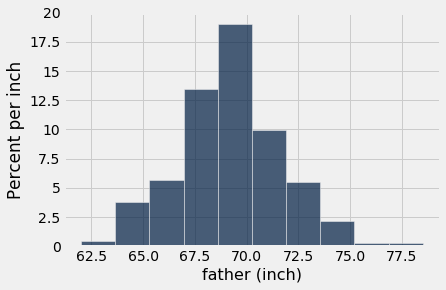

In [6]:
height.hist('father', unit='inch')

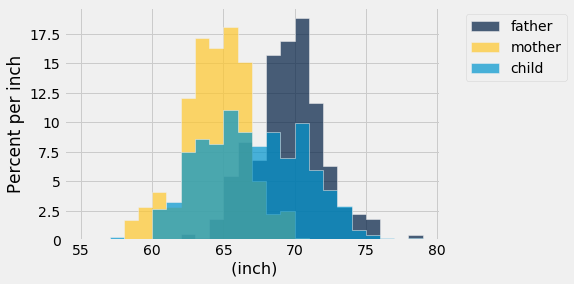

In [7]:
height.hist(unit='inch', bins=np.arange(55, 80, 1))

Question: why is the maximum height of a bar for child smaller than that for mother or father?
* A) mothers and fathers are adult height; kids might be kid heights
* B) kids could be either gender, leading to a wider distribution

## Functions

In [92]:
def double(myvar):
    """ Returns the sum of the two arguments """
    return 2*myvar

In [91]:
help(sum_func)

Help on function sum_func in module __main__:

sum_func(var_one, var_two)
    Returns the sum of the two arguments



In [83]:
double(40)

TypeError: double() takes 0 positional arguments but 1 was given

In [72]:
var_x

10

In [93]:
double(5/4)

2.5

In [77]:
y = 5
double(y/4)

2.5

In [ ]:
x

In [ ]:
x = 1.5
double(x)

In [ ]:
x

What happens if I double an array?

In [94]:
double(make_array(3,4,5))

array([ 6,  8, 10])

What happens if I double a string?

In [ ]:
double("string")

In [ ]:
5*"string"

What does this code do?

In [101]:
counts = make_array(1, 2, 3)
total = counts.sum()
#counts/total*100
np.round((counts/total)*100, 2)

array([16.67, 33.33, 50.  ])

In [102]:
def percents(counts):
    """Convert the counts to percents out of the total."""
    total = counts.sum()
    return np.round((counts/total)*100, 2)

In [104]:
help(percents)

Help on function percents in module __main__:

percents(counts)
    Convert the counts to percents out of the total.



In [105]:
percents(make_array(2, 4, 8, 6, 10))

array([ 6.67, 13.33, 26.67, 20.  , 33.33])

In [106]:
def percents(counts, decimal_places=2, extra=0):
    """Convert the counts to percents out of the total + extra."""
    total = counts.sum() + extra
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place:", percents(parts, 1), "or", percents(parts, decimal_places=1))
print("Rounded to the default number of decimal places:", percents(parts))
print("Rounded to the default number of decimal places, but with extra:", percents(parts, extra=3))

Rounded to 1 decimal place: [28.6 14.3 57.1] or [28.6 14.3 57.1]
Rounded to the default number of decimal places: [28.57 14.29 57.14]
Rounded to the default number of decimal places, but with extra: [20. 10. 40.]


# Scope

In [ ]:
def tell_me_arg_value(arg):
    return arg

In [ ]:
tell_me_arg_value(8)

In [ ]:
tell_me_arg_value(5)

In [ ]:
def tell_me_another_arg_value(arg):
    return another_arg

In [ ]:
tell_me_another_arg_value(8)

In [ ]:
another_arg = 7

In [ ]:
tell_me_another_arg_value(8)

## Apply

In [ ]:
def cut_off_at_72(x):
    """The smaller of x and 72"""
    return min(x, 72)

In [ ]:
cut_off_at_72(62)

In [ ]:
cut_off_at_72(72)

In [ ]:
cut_off_at_72(78)

The table `apply` method applies a function to every entry in a column.

In [ ]:
cut_off = height.apply(cut_off_at_72, 'child')
cut_off

In [ ]:
cut_off_at_72

In [ ]:
type(cut_off_at_72)

In [ ]:
help(cut_off_at_72)

## Apply with multiple columns

In [ ]:
parent_max = height.apply(max, 'mother', 'father')
#height.with_column('parent_max', parent_max).scatter('father','parent_max')
parent_max

In [ ]:
def avg(x, y):
    """Compute the average of two values"""
    return (x+y)/2

In [ ]:
parent_avg = height.apply(avg, 'mother', 'father')
parent_avg

## Prediction

In [ ]:
height

In [ ]:
height.scatter('child')

Add a column with parents' average height to the height table

In [ ]:
height = height.with_column(
    'parent average', parent_avg
)
height

In [ ]:
height.scatter('parent average', 'child')

In [ ]:
height.scatter('parent average', 'child')

# this code draws two red lines on the plot to show 
# children whose parents' average heights are around 68
_ = plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)

In [ ]:
close_to_68 = height.where('parent average', are.between(67.5, 68.5))
close_to_68

In [ ]:
close_to_68.column('child').mean()

In [ ]:
def predict_child(pa):
    close_points = height.where('parent average', are.between(pa - 0.5, pa + 0.5))
    return close_points.column('child').mean()                       

In [ ]:
predict_child(68)

In [ ]:
predict_child(65)

In [ ]:
# Apply predict_child to all the parent averages

height_pred = height.with_column(
    'prediction', height.apply(predict_child, 'parent average')
)

In [ ]:
height_pred.select('child', 'parent average', 'prediction').scatter('parent average')